In [568]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

city_ride_data = pd.merge(ride_data_df, city_data_df, how="right", on=["city"])

# Display the data table for preview
city_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/18 10:14,13.83,5.739410e+12,5,Urban
1,Lake Jonathanshire,4/7/18 20:51,31.25,4.441250e+12,5,Urban
2,Lake Jonathanshire,3/9/18 23:45,19.89,2.389500e+12,5,Urban
3,Lake Jonathanshire,4/7/18 18:09,24.28,7.796810e+12,5,Urban
4,Lake Jonathanshire,1/2/18 14:14,13.89,4.242550e+11,5,Urban


In [569]:
#City Data DataFrame

# df.groupby('Item ID').agg({'Purchase ID':'sum', 'column':'count', 'Age':'max', "Gender":'first'})

#Drop dublicate drivers
dropped_drivers = city_ride_data.drop_duplicates("city")
cr_group_drop = dropped_drivers.groupby("city")

#Groupby city
city_ride_grouped = city_ride_data.groupby("city")

city_avg_fare = city_ride_grouped["fare"].mean()
city_rides_total = city_ride_grouped["ride_id"].count()
city_drivers_total = cr_group_drop["driver_count"].sum()

by_city_df = pd.DataFrame({"Average Fare by City": city_avg_fare,
                         "Total Rides by City": city_rides_total,
                         "Total Drivers by City": city_drivers_total})
by_city_df.head()

,Average Fare by City,Total Rides by City,Total Drivers by City
city,,,
Amandaburgh,24.641667,18,12
Barajasview,25.332273,22,26
Barronchester,36.422500,16,11
Bethanyland,32.956111,18,22
Bradshawfurt,40.064000,10,7


In [577]:
#This uses .agg to count "first" city drivers from merged df.

city_data2 = city_ride_data.groupby('city').agg({"fare": "mean", "ride_id": "count", "driver_count": "first", "type": "first"})
print(city_data2)



                           fare  ride_id  driver_count      type
city                                                            
Amandaburgh           24.641667       18            12     Urban
Barajasview           25.332273       22            26     Urban
Barronchester         36.422500       16            11  Suburban
Bethanyland           32.956111       18            22  Suburban
Bradshawfurt          40.064000       10             7     Rural
Brandonfort           35.437368       19            10  Suburban
Carriemouth           28.314444       27            52     Urban
Christopherfurt       24.501852       27            41     Urban
Colemanland           30.894545       22            23  Suburban
Davidfurt             31.995882       17            23  Suburban
Deanville             25.842632       19            49     Urban
East Aaronbury        25.661111        9             7  Suburban
East Danielview       31.560588       17            22  Suburban
East Kaylahaven       23.


## Bubble Plot of Ride Sharing Data

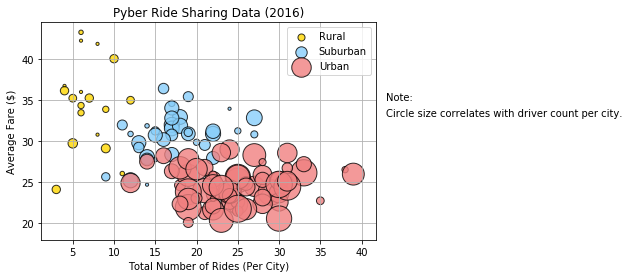

In [589]:
# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types
# Incorporate the other graph properties
# Create a legend
# Incorporate a text label regarding circle size
# Save Figure

rural_data = city_data2.loc[city_data2["type"] == "Rural"]
suburban_data = city_data2.loc[city_data2["type"] == "Suburban"]
urban_data = city_data2.loc[city_data2["type"] == "Urban"]

plt.scatter(rural_data["ride_id"], rural_data["fare"], edgecolors='black', facecolors='gold',
                  label='Rural', alpha=.8, s=rural_data["driver_count"]*10)
plt.scatter(suburban_data["ride_id"], suburban_data["fare"], edgecolors='black', facecolors='lightskyblue',
                label='Suburban', alpha=.8, s=suburban_data["driver_count"]*10)
plt.scatter(urban_data["ride_id"], urban_data["fare"], edgecolors='black', facecolors='lightcoral',
                  label='Urban', alpha=.8, s=urban_data["driver_count"]*10)
 
plt.grid(True)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.text(43, 35, "Note:")
plt.text(43, 33, "Circle size correlates with driver count per city.")
plt.legend()

plt.savefig("Pyber_Scatter_Plot_2.png")

plt.show()


In [584]:
#USED df.plot() but couldn't get the graph on this. 

# color_key = {"Rural": "gold", "Suburban": "lightskyblue", "Urban": "lightcoral"}
# city_data2["color"] = city_data2["type"].apply(lambda x: color_key.get(x))

# city_data2.plot("ride_id", "fare", kind='scatter', edgecolors='black', color=city_data2["color"],
#                 label=t, legend=True, alpha=.8, grid=True, s=city_data2["driver_count"]*10)

# plt.title("Pyber Ride Sharing Data (2016)")
# plt.xlabel("Total Number of Rides (Per City)")
# plt.ylabel("Average Fare ($)")
# plt.text(42, 35, "Note:")
# plt.text(42, 33, "Circle size correlates with driver count per city.")
# plt.legend()
 
# plt.show()

# plt.savefig("../Images/Pyber_Scatter_Plot.png")

In [13]:
# Show plot
plt.show()

## Total Fares by City Type

In [571]:
# Calculate Type Percents

#Group by Type to be used in remaining pie charts
city_type_group = city_ride_data.groupby("type")

total_fares_by_type = city_type_group["fare"].sum()

fare_percentage = total_fares_by_type/(city_ride_data["fare"].sum())*100
fare_percentage


type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

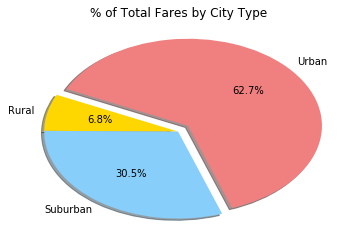

In [590]:
# Build Pie Chart using plt.pie()
city_type = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0, 0, 0.1]


plt.pie(fare_percentage, labels=city_type, colors=colors, explode=explode, autopct="%1.1f%%", shadow=True, startangle=155)
plt.title("% of Total Fares by City Type")

plt.savefig("City_Top_Total.png")

plt.show()

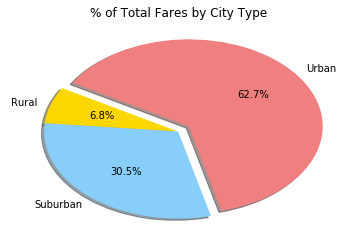

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

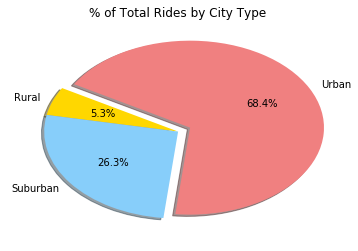

In [591]:
# Calculate Ride Percents

# city_type_group = city_ride_data.groupby("type")

total_rides_by_type = city_type_group["ride_id"].count()

rides_percentage = total_rides_by_type/(city_ride_data["ride_id"].count())*100
rides_percentage

# Build Pie Chart using plt.pie()
plt.pie(rides_percentage, labels=city_type, colors=colors, explode=explode, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

plt.savefig("City_Type_Total_Rides.png")

plt.show()


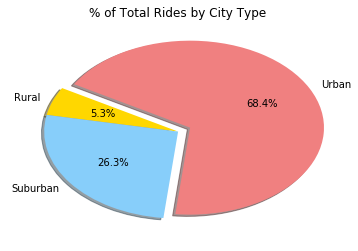

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

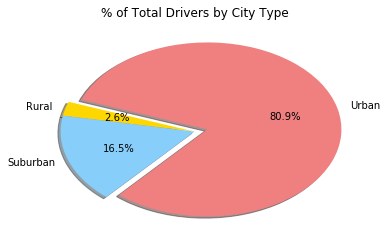

In [592]:
# Calculate Driver Percents

city_type_group_drop = dropped_drivers.groupby("type")

total_drivers_by_type = city_type_group_drop["driver_count"].sum()

drivers_percentage = total_drivers_by_type/(dropped_drivers["driver_count"].sum())*100

#Build Pie Chart
plt.pie(drivers_percentage, labels=city_type, colors=colors, explode=explode, autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Drivers by City Type")

plt.savefig("City_Type_Total_Drivers.png")

plt.show()


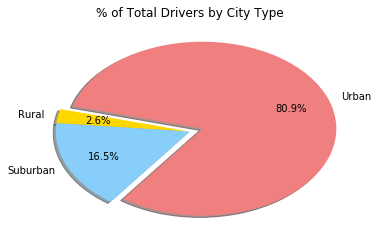

In [6]:
# Show Figure
plt.show()